## Liberary

In [597]:
from k_means_const_manhattan import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from itertools import permutations

## Auxiliary functons

In [598]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

In [599]:
def check_location(delivery_loc, border):
    euc_pts = []
    man_pts = []

    for loc in delivery_loc:
        if loc[0] <= border[0][0]:
            euc_pts.append(loc)
        else:
            man_pts.append(loc)

    return euc_pts, man_pts

Visualization

In [600]:
def initial_plot(delivery_loc, border):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    # plot the border
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Delivery Locations")
    plt.show()

In [601]:
def clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Clustering")
    plt.show()

In [602]:
def tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    
    for i in range(len(euclidean_clusters)):
        path = euclidean_clusters[i]
        
        for j in range(len(path)-1):
            plt.plot((path[j][0],path[j+1][0]),(path[j][1],path[j+1][1]))

    for i in range(len(manhattan_clusters)):
        path = manhattan_clusters[i]
        
        for j in range(len(path)-1):
            plt.plot((path[j][0],path[j][0]),(path[j][1],path[j+1][1]))
            plt.plot((path[j][0],path[j+1][0]),(path[j+1][1],path[j+1][1]))
    
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Calculating shortest path")
    # plt.show()

In [603]:
def dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, dp):
    tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border)
    plt.scatter(dp[0], dp[1],marker='X',c="red",s=200)

kMeans

In [604]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [605]:
# from k_means_constrained import KMeansConstrained
import k_means_constrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = k_means_constrained.KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

TSP

In [606]:
def calculate_manhattan_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [607]:
def calculate_euclidean_distance(pt1, pt2):
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    return np.sqrt(np.sum((pt2 - pt1)**2))

In [608]:
def calculate_path_distance(path, manhattan = False):
    distance = 0
    if not manhattan:
        for i in range(len(path)-1):
            distance += np.sqrt((path[i+1][0]-path[i][0])**2 + (path[i+1][1] - path[i][1])**2)
    else:
        for i in range(len(path)-1):
            distance += abs(path[i+1][0]-path[i][0]) + abs(path[i+1][1] - path[i][1])

    return distance

In [609]:
def tsp_euc(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = False)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

In [610]:
def tsp_man(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = True)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

In [611]:
def shortest_path_euc(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            # sum += calculate_euclidean_distance(points[j], points[j+1])
            sum += calculate_path_distance([points[j], points[j+1]], manhattan=False)
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx], cost[idx]

In [612]:
def shortest_path_man(cluster, dp, inter_point = None):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        if inter_point != None:
            cur = path[i]
            path[i].insert(1,[inter_point, cur[1][1]])
            path[i].append([inter_point, cur[-1][1]])
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            # sum += calculate_manhattan_distance(points[j], points[j+1])
            sum += calculate_path_distance([points[j], points[j+1]], manhattan=True)
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx], cost[idx]

CP creation

In [613]:
def create_euc_dp(euclidean_clusters, manhattan_clusters, border, centroid = None, method = "entry_exit"):
    if method == "entry_exit":
        entry_exit_point_euc = []
        entry_exit_point_man = []

        for cls_id, path in euclidean_clusters.items():
            entry_exit_point_euc.append(path[0])
            entry_exit_point_euc.append(path[-1])

        for cls_id, path in manhattan_clusters.items():
            entry_exit_point_man.append([border[0][0], path[0][1]])
            entry_exit_point_man.append([border[0][0], path[-1][1]])

        combined_points = entry_exit_point_euc + entry_exit_point_man

        x = [i for i,j in combined_points]
        y = [j for i,j in combined_points]
    
    else:
        x = [i if i<border[0][0] else border[0][0] for i,j in centroid]
        y = [j for i,j in centroid]

    return [np.mean(x), np.mean(y)]

## Main

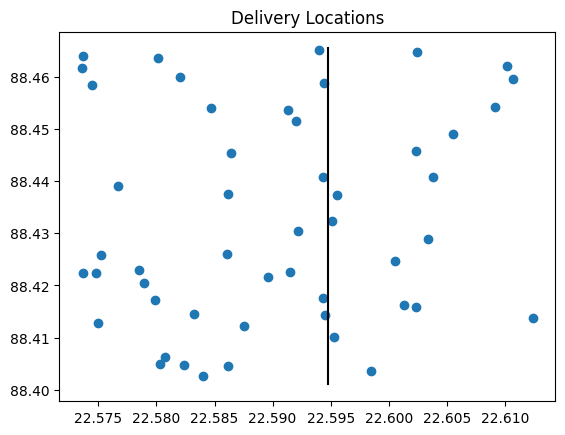

In [614]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
border = [[22.5948, 88.4010],[22.5948, 88.4654]]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc,border)

In [615]:
# separating euclidean and manhattan points
euclidean_points, manhattan_points = check_location(delivery_loc, border)

print(len(euclidean_points), len(manhattan_points))

34 16


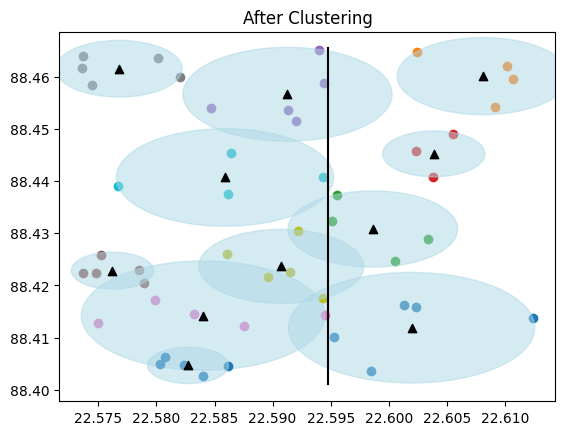

In [616]:
# Cluster the data and get the labels and centroids
manhattan_centroids, manhattan_clusters = KMeans(manhattan_points, len(manhattan_points), k)
euclidean_centroids, euclidean_clusters = KMeans(euclidean_points, len(euclidean_points), k)

# Visualize the data
clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border)

In [617]:
# apply tsp in each of the clusters
for cls_no, cluster in euclidean_clusters.items():
    euclidean_clusters[cls_no] = tsp_euc(cluster)

for cls_no, cluster in manhattan_clusters.items():
    manhattan_clusters[cls_no] = tsp_man(cluster)

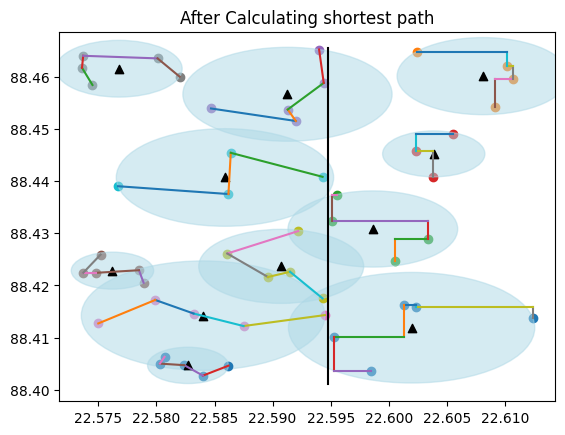

In [618]:
tsp_path_plot( euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border)

<font color="orange">Euclidean side dp</font>

Entry Exit Method

[22.58825454545455, 88.43351818181817]


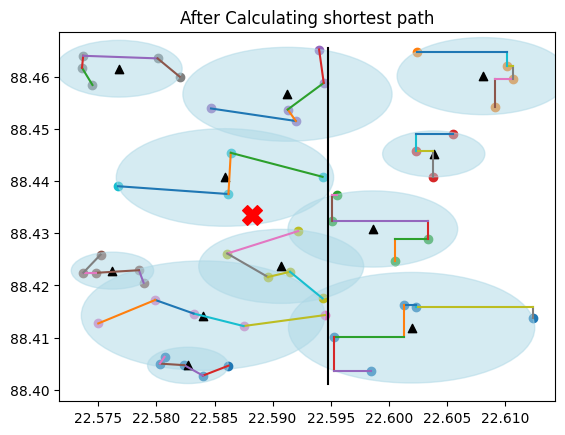

In [619]:
DP_1 = create_euc_dp(euclidean_clusters, manhattan_clusters, border, method="entry_exit")

print(DP_1)
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_1)

In [620]:
total_distance_1 = 0

euclidean_cluster_distance = 0
for cls_id, path in euclidean_clusters.items():
    temp_path = path.copy()
    temp_path.append(DP_1)
    temp_path.insert(0, DP_1)

    euclidean_cluster_distance += calculate_path_distance(temp_path, manhattan = False)

dp_to_border_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = []
    temp_path.append(DP_1)
    temp_path.append([border[0][0], path[0][1]])
    dp_to_border_distance += calculate_path_distance(temp_path, manhattan = False)

    temp_path = []
    temp_path.append([border[0][0], path[-1][1]])
    temp_path.append(DP_1)

    dp_to_border_distance += calculate_path_distance(temp_path, manhattan = False)

manhattan_cluster_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = path.copy()
    temp_path.append([border[0][0], path[-1][1]])
    temp_path.insert(0, [border[0][0], path[0][1]])

    manhattan_cluster_distance += calculate_path_distance(temp_path, manhattan = True)

total_distance_1 = euclidean_cluster_distance + dp_to_border_distance + manhattan_cluster_distance

print("Total distance in entry exit approach :",total_distance_1)

Total distance in entry exit approach : 0.7287269573257111


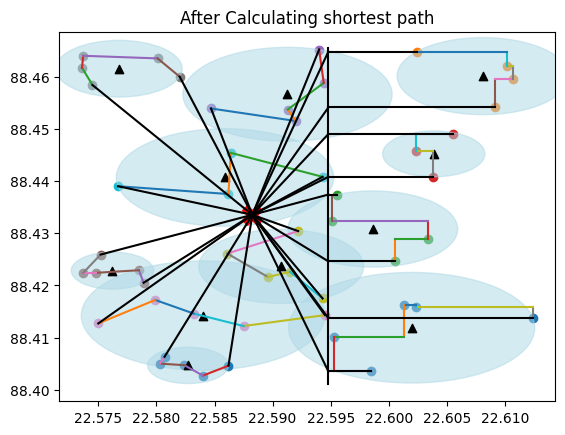

In [621]:
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_1)

for cls_id, path in euclidean_clusters.items():
    plt.plot(([DP_1[0],path[0][0]]),([DP_1[1],path[0][1]]),c="black")
    plt.plot(([DP_1[0],path[-1][0]]),([DP_1[1],path[-1][1]]), c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot([DP_1[0], border[0][0]],[DP_1[1], path[0][1]],c="black")
    plt.plot([DP_1[0], border[0][0]],[DP_1[1], path[-1][1]], c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot(([border[0][0],path[0][0]]),([path[0][1],path[0][1]]),c="black")
    plt.plot(([border[0][0],path[-1][0]]),([path[-1][1],path[-1][1]]), c="black")

Centroid method

[22.58789636363636, 88.43382863636363]


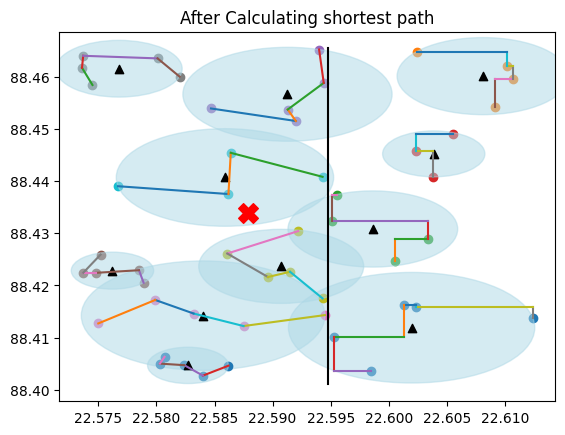

In [622]:
DP_2 = create_euc_dp(euclidean_clusters, manhattan_clusters, border,euclidean_centroids.tolist() + manhattan_centroids.tolist(), method="centroid")

print(DP_2)
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_2)

In [623]:
modified_euc_cluster = dict()
modified_man_cluster = dict()
total_distance_2 = 0

for i in euclidean_clusters:
    modified_euc_cluster[i], distance = shortest_path_euc(euclidean_clusters[i].copy(), DP_2)
    total_distance_2 += distance

for i in manhattan_clusters:
    modified_man_cluster[i], distance = shortest_path_man(manhattan_clusters[i].copy(), DP_2, inter_point = border[0][0])
    total_distance_2 += distance

print("Total distance in centroid approach :",total_distance_2)

Total distance in centroid approach : 0.7353066002294559


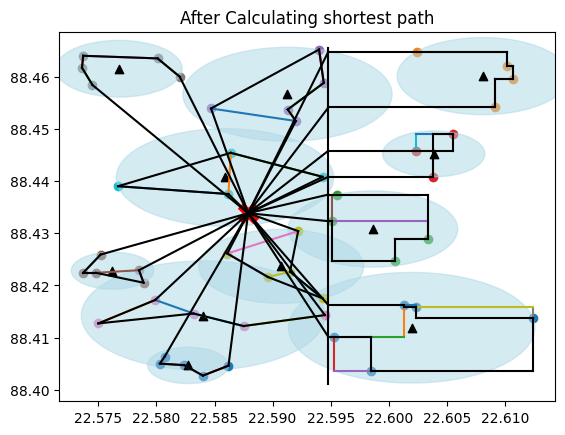

In [624]:
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_2)

for cls_id, path in modified_euc_cluster.items():
    for i in range(len(path)-1):
        plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]], c="black")

for i in modified_man_cluster:
    pts = np.array(modified_man_cluster[i])

    for j in range(1,len(pts)-2):
        pt_1 = pts[j]
        pt_2 = pts[j+1]

        # x axis
        f_pt = np.array([pt_1[0], pt_1[0]])
        s_pt = np.array([pt_1[1], pt_2[1]])

        # y axis
        t_pt = np.array([pt_1[0], pt_2[0]])
        l_pt = np.array([pt_2[1], pt_2[1]])

        plt.plot(f_pt, s_pt, c="black")
        plt.plot(t_pt, l_pt, c="black")

    plt.plot((pts[0][0],pts[1][0]),(pts[0][1],pts[1][1]), c="black")
    plt.plot((pts[-2][0],pts[-1][0]),(pts[-2][1],pts[-1][1]), c="black")

comparison

In [625]:
print("distance in approach 1 :",total_distance_1)
print("distance in approach 2 :",total_distance_2)

distance in approach 1 : 0.7287269573257111
distance in approach 2 : 0.7353066002294559
